In [14]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt
from IPython.display import Audio
from glob import glob
import pandas as pd

In [40]:
audio_file="./Dataset/03-01-01-01-01-01-01.wav"

Audio(audio_file)

y,sr = librosa.load(audio_file)
# This code will load the audio file using librosa.load(), which returns the audio waveform (y) and the sampling rate (sr).
# Then, it uses IPython.display.Audio to display the audio in the notebook.

In [4]:
# Print information about the audio signal
print(f'y: {y[:10]}')  # Print the first 10 samples of the audio signal
print(f'shape y: {y.shape}')  # Print the shape of the audio signal
print(f'sr: {sr}')  # Print the sampling rate

y: [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09  3.8985988e-08
 -7.6543131e-08  1.1907758e-07 -1.6708444e-07  2.2135782e-07
 -2.8319053e-07  3.5470680e-07]
shape y: (72838,)
sr:22050


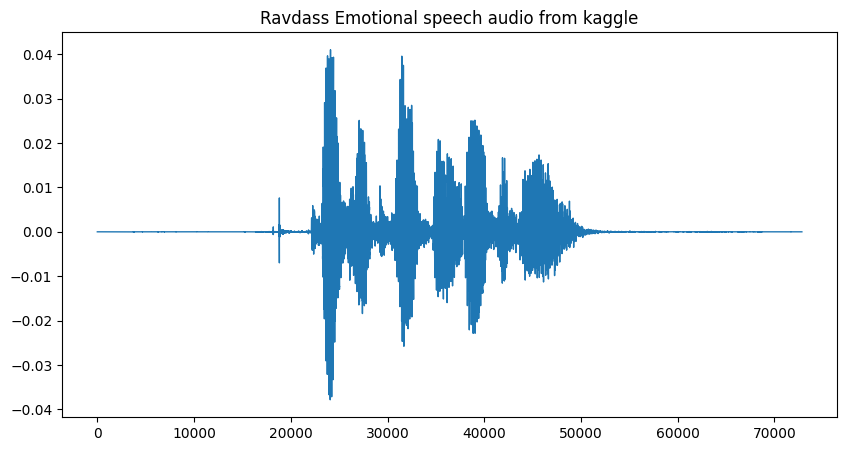

In [5]:
pd.Series(y).plot(figsize=(10,5),
                  lw=1, # line width in the plot
                  title="Ravdass Emotional speech audio from kaggle")
plt.show()

In [6]:
y_trimmed, _= librosa.effects.trim(y) #y_trimmed contains the trimmed audio signal without leading and trailing silence.
y_trimmed

array([-1.3339210e-06,  3.3980346e-06,  1.2099962e-05, ...,
       -3.3029522e-08,  2.6610785e-08, -2.0195303e-08], dtype=float32)

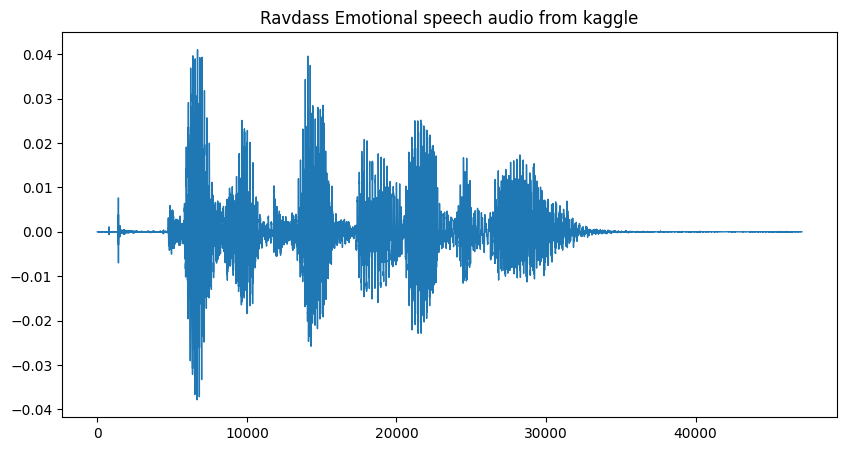

In [24]:
pd.Series(y_trimmed).plot(figsize=(10,5),
                  lw=1,
                  title="Ravdass Emotional speech audio from kaggle",
                  )
plt.show()

In [8]:
D = librosa.stft(y) # short time fourier transform of the audio y
# Compute the Short-Time Fourier Transform (STFT) of the audio signal

# Convert the magnitude(or amplitude) spectrogram to decibels
librosa.amplitude_to_db(np.abs(D),ref=np.max)


array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [16]:
D = librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D),ref=np.max) # transform amplitude into decibels
s_db.shape


(1025, 143)

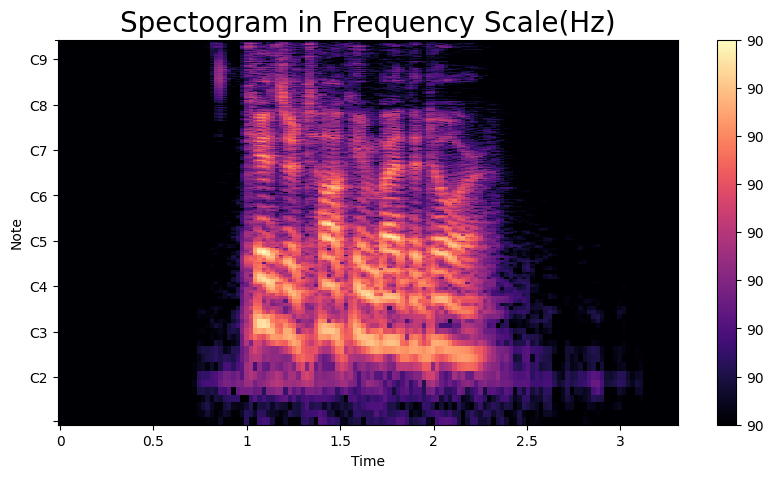

In [37]:
# Plot the transformed data
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(s_db,
                             x_axis="time",
                             y_axis="log",
                             ax=ax)
ax.set_title("Spectogram in Frequency Scale", fontsize=20)
fig.colorbar(img,ax=ax,format=f'{90}')

In [29]:
S= librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128)
S_db_mel=librosa.amplitude_to_db(S,ref=np.max) # transfrom amplitude into decibels

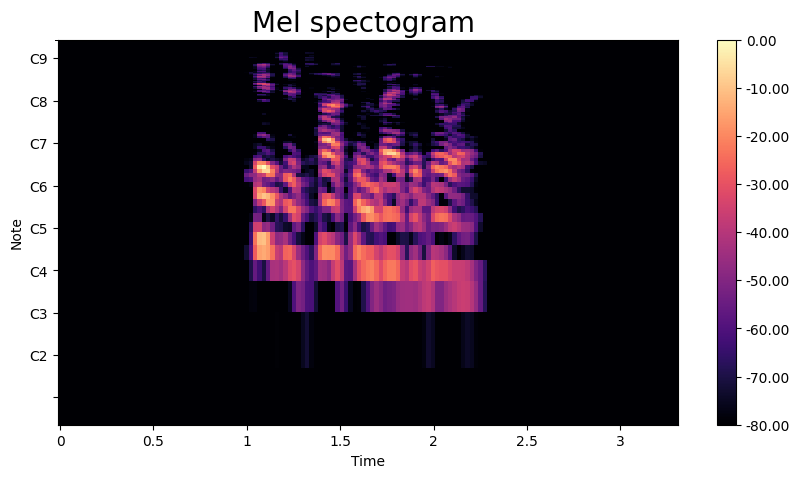

In [39]:
fig, ax =plt.subplots(figsize=(10,5))
# Plot the transformed data
img=librosa.display.specshow(S_db_mel,
                             x_axis="time",
                             y_axis="fft_note",
                             ax=ax)
ax.set_title("Mel spectogram ", fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')

In [41]:
from scipy.io import wavfile
import IPython.display as ipd

def play_audio(audio_file):
    """
    Plays the given audio file.

    Args:
        audio_file (str): Path to the audio file.
    """
    sample_rate, audio_data = wavfile.read(audio_file)
    return ipd.Audio(audio_data, rate=sample_rate)

# Usage
audio_file = "./Dataset/03-01-01-01-01-01-01.wav"
ipd.display(play_audio(audio_file))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2556\2990324111.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_file)
